In [1]:
# Data reading and manipulation 
import numpy as np
import pandas as pd

# Data preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Data modellling 
from sklearn.linear_model import LogisticRegression

# Model evaluation 
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

# Data visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the data

In [2]:
iris = pd.read_csv('../data/modifiedIris2Classes.csv')

In [3]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,7.0,3.2,4.7,1.4,0
1,6.4,3.2,4.5,1.5,0
2,6.9,3.1,4.9,1.5,0
3,5.5,2.3,4.0,1.3,0
4,6.5,2.8,4.6,1.5,0


In [4]:
X = iris.iloc[:,:-1]
y = iris.iloc[:,-1]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [34]:
scaler = StandardScaler()
scaler.fit(X_train) #feed the means and stdevs of each column of X_train to the scaler 
X_scaled_train = scaler.transform(X_train) #transform wrt means and stdevs of train set 
X_scaled_test = scaler.transform(X_test) #transform wrt means and stdevs of train set 

# Logistic Regression

In [6]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [15]:
labels = iris.columns[:-1]
coefficients = np.array(clf.coef_).transpose()

In [19]:
print(f'The intercept for the logistic regression is {clf.intercept_[0]}')

The intercept for the logistic regression is -13.162740778051848


In [17]:
for coef, label in zip(coefficients,labels):
    print(f'The coefficient of {label} is {coef[0]}')

The coefficient of sepal length (cm) is -0.3567446809905793
The coefficient of sepal width (cm) is -0.7375019293145142
The coefficient of petal length (cm) is 2.834251273478908
The coefficient of petal width (cm) is 2.1928716629617235


# Predictions 

In [20]:
# For F1 score, precision, recall and confusion matrix 
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

In [26]:
# predicting on single X 
pred_data = np.array([7.0,3.2,4.7,1.4]).reshape((1,4))
print(f'The prediction for this test data is {clf.predict(pred_data)}')
print(f'The probabilities for this test data is {clf.predict_proba(pred_data)}')
print(f'The probability before applying the sigmoid function is {clf.predict_log_proba(pred_data)}') #we rarely use this 

The prediction for this test data is [0]
The probabilities for this test data is [[0.8360269 0.1639731]]
The probability before applying the sigmoid function is [[-0.17909449 -1.80805289]]


$Precision = \frac{TP}{TP+FP}$<br>
$Recall = \frac{TP}{TP+FN}$

$F1 = 2\times \frac{Precision\times Recall}{Precision+Recall}$ <br>
Harmonic mean of Precision and Recall<br>

F1 score takes both FP and FN into account, hence more accurate 

# Model Evaluation

In [32]:
# For train set 
precision_train = precision_score(y_true=y_train, y_pred=train_pred)
recall_train = recall_score(y_true=y_train,y_pred=train_pred)
f1_train = f1_score(y_true=y_train, y_pred=train_pred)

print(f'The precision for training set is {precision_train}')
print(f'The recall for train set is {recall_train}')
print(f'Hence the F1 score is {f1_train}')

The precision for training set is 0.9761904761904762
The recall for train set is 0.9761904761904762
Hence the F1 score is 0.9761904761904762


In [33]:
# Confusion Matrix 
conf_matrix = confusion_matrix(y_true=y_train, y_pred=train_pred)
print(conf_matrix)

[[37  1]
 [ 1 41]]


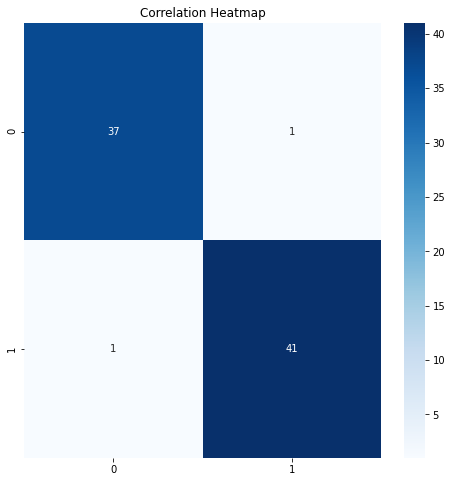

In [39]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_matrix, annot=True,ax=ax,cmap="Blues")
ax.set_title('Correlation Heatmap');